## Observations and Insights 

In [437]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df=pd.merge(mouse_metadata,study_results, on='Mouse ID', how= 'outer' )

# Display the data table for preview

combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [438]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()

249

In [439]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_timepoint= combined_df.groupby("Mouse ID")
mouse_timepoint_df=pd.DataFrame(mouse_timepoint["Timepoint"].value_counts())
mouse_timepoint_df


Timepoint
Mouse ID Timepoint           
a203     0                  1
         5                  1
         10                 1
         15                 1
         20                 1
...                       ...
z969     25                 1
         30                 1
         35                 1
         40                 1
         45                 1

[1888 rows x 1 columns]

In [440]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates=combined_df[combined_df.duplicated()]
duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [441]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
remove_dup_mice = combined_df.drop_duplicates(keep=False, inplace=True)
remove_dup_mice

In [442]:
# Checking the number of mice in the clean DataFrame.
mouse_timepoint= combined_df.groupby("Mouse ID")
mouse_timepoint_df=pd.DataFrame(mouse_timepoint["Timepoint"].value_counts())
mouse_timepoint_df


Timepoint
Mouse ID Timepoint           
a203     0                  1
         5                  1
         10                 1
         15                 1
         20                 1
...                       ...
z969     25                 1
         30                 1
         35                 1
         40                 1
         45                 1

[1887 rows x 1 columns]

In [443]:
#Count number of mice in clean dataframe still equal 249 however there are 1887 rows of data
combined_df["Mouse ID"].nunique()

249

## Summary Statistics

In [444]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
stat_table = pd.DataFrame(combined_df.groupby("Drug Regimen").count())

stat_table["SEM"] = pd.DataFrame(combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())
stat_table["Median"] = pd.DataFrame(combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
stat_table["Standard Deviation"] = pd.DataFrame(combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
stat_table["Mean"] = pd.DataFrame(combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
stat_table["Variance"] = pd.DataFrame(combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())


#Clean up columns, just keeping a count column for some of the graphs below
stat_table =stat_table[["Mouse ID"
                        ,"Mean", "Median","Variance"
                        , "Standard Deviation", "SEM", ]]
stat_table
#see next 

,Mouse ID,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,159,52.414660,50.965298,42.199890,6.496144,0.515178
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


In [445]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

stat_table = pd.DataFrame(combined_df.groupby("Drug Regimen").count())

stat_table["SEM"] = pd.DataFrame(combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())
stat_table["Median"] = pd.DataFrame(combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
stat_table["Standard Deviation"] = pd.DataFrame(combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
stat_table["Mean"] = pd.DataFrame(combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
stat_table["Variance"] = pd.DataFrame(combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())


#Clean up columns, just keeping a count column for some of the graphs below
stat_table = stat_table[["Mouse ID"
                        ,"Mean", "Median","Variance"
                        , "Standard Deviation", "SEM", ]]
stat_table


,Mouse ID,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,159,52.414660,50.965298,42.199890,6.496144,0.515178
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

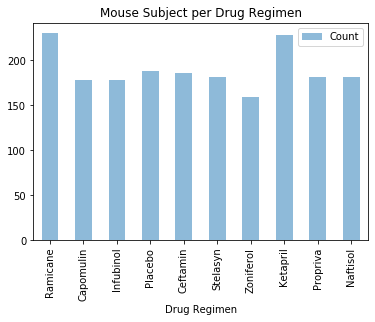

<Figure size 432x288 with 0 Axes>

In [446]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#Mice_treatment = combined_df[['Drug Regimen']].drop_duplicates()
#Mice_treatment['Count'] = combined_df.groupby('Drug Regimen').count()['Mouse ID'].values
Counts=combined_df['Drug Regimen'].value_counts()
Mice_treatment.plot.bar('Drug Regimen','Count',alpha = 0.5)
plt.title("Mouse Subject per Drug Regimen")
plt.show()
plt.savefig('BarPlot1')

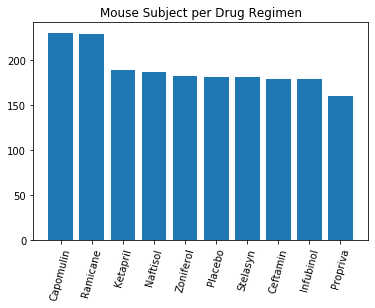

<Figure size 432x288 with 0 Axes>

In [447]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
Counts=combined_df['Drug Regimen'].value_counts()
plt.bar(Counts.index.values,Counts.values)
plt.title("Mouse Subject per Drug Regimen")
plt.xticks(rotation=75)
plt.show()
plt.savefig('BarPlot2')

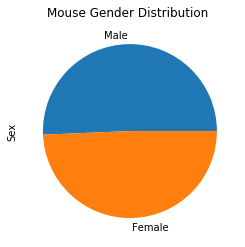

In [448]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plt.title("Mouse Gender Distribution ")
Mouse_pie = combined_df["Sex"].value_counts().plot.pie()
plt.savefig('Mouse Pie1')

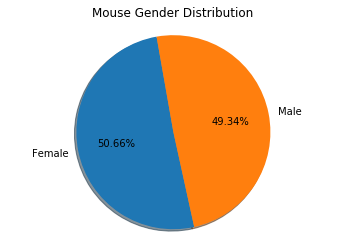

<Figure size 432x288 with 0 Axes>

In [449]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("Mouse Gender Distribution ")
plt.pie(combined_df["Sex"].value_counts(), autopct="%2.2f%%"
        , startangle=100,shadow=True, labels=["Female", "Male"])
plt.axis("equal")
plt.show()
plt.savefig('Mouse Pie2')



## Quartiles, Outliers and Boxplots

In [450]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse (sub_group = mice)
sub_group =combined_df.groupby("Mouse ID").max()
sub_group=sub_group.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
group=pd.merge(sub_group[["Mouse ID", "Timepoint"]], combined_df, on=["Mouse ID", "Timepoint"],how="left")

#Each Drug Results: Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df=group.loc[group["Drug Regimen"]=="Capomulin",:]
C_Tumor=Capomulin_df["Tumor Volume (mm3)"]
Quartile = C_Tumor.quantile([.25,.5,.75])
Low_Q= Quartile[0.25]
Upper_Q= Quartile[0.75]
IQR = Upper_Q - Low_Q
C_Lower = Low_Q - (1.5*IQR)
C_Upper = Upper_Q + (1.5*IQR)


Ramicane_df=group.loc[group["Drug Regimen"]=="Ramicane",:]
R_Tumor=Ramicane_df["Tumor Volume (mm3)"]
Quartile = R_Tumor.quantile([.25,.5,.75])
Low_Q= Quartile[0.25]
Upper_Q= Quartile[0.75]
IQR = Upper_Q - Low_Q
R_Lower = Low_Q - (1.5*IQR)
R_Upper = Upper_Q + (1.5*IQR)


Infubinol_df=group.loc[group["Drug Regimen"]=="Infubinol",:]
I_Tumor=Infubinol_df["Tumor Volume (mm3)"]
Quartile = I_Tumor.quantile([.25,.5,.75])
Low_Q= Quartile[0.25]
Upper_Q= Quartile[0.75]
IQR = Upper_Q - Low_Q
I_Lower = Low_Q - (1.5*IQR)
I_Upper = Upper_Q + (1.5*IQR)

Ceftamin_df=group.loc[group["Drug Regimen"]=="Ceftamin",:]
CE_Tumor=Ceftamin_df["Tumor Volume (mm3)"]
Quartile = CE_Tumor.quantile([.25,.5,.75])
Low_Q= Quartile[0.25]
Upper_Q= Quartile[0.75]
IQR = Upper_Q - Low_Q
CE_Lower = Low_Q - (1.5*IQR)
CE_Upper = Upper_Q + (1.5*IQR)

print(f"IRQ range of final tumor volume is: {IQR}")
print(f"Potential outliers final tumor volumes for each drug")
print(f"Capomulin:  {C_Lower} or above {C_Upper}")
print(f"Ramicane:   {R_Lower} or above {R_Upper}")
print(f"Infubinol:  {I_Lower} or above {I_Upper}")
print(f"Ceftamin:   {CE_Lower} or above {CE_Upper}")

#Drug_Summary=Drug_Summary[[




IRQ range of final tumor volume is: 15.577752179999997
Potential outliers final tumor volumes for each drug
Capomulin:  20.70456164999999 or above 51.83201549
Ramicane:   17.912664470000003 or above 54.30681135
Infubinol:  36.83290494999999 or above 82.74144559000001
Ceftamin:   25.355449580000002 or above 87.66645829999999


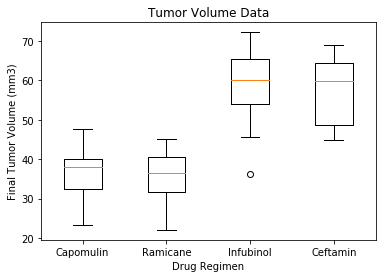

In [451]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

Treatment_List = [C_Tumor,R_Tumor,I_Tumor, CE_Tumor ]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Data')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(Treatment_List, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('Whisker plot Tumor Vol')
plt.show()
    

## Line and Scatter Plots

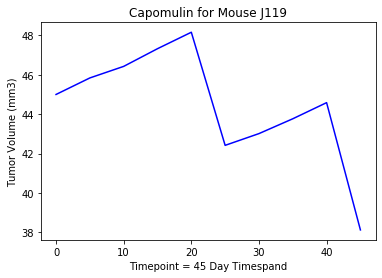

<Figure size 432x288 with 0 Axes>

In [452]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
One_mouse = combined_df.loc[(combined_df["Mouse ID"] == "j119"), :]
treated = One_mouse["Tumor Volume (mm3)"]
tumor_volume = One_mouse["Timepoint"]
line_plot = plt.plot(tumor_volume, treated, color = "blue")

plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint = 45 Day Timespand')
plt.title("Capomulin for Mouse J119")
plt.show()
plt.savefig('Mouse Stats J119')

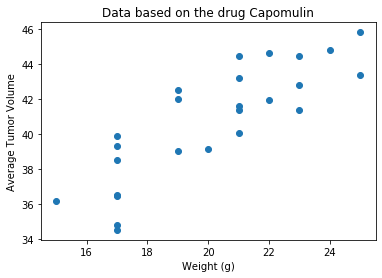

<Figure size 432x288 with 0 Axes>

In [453]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin", :]
group_drug = Capomulin_df.groupby("Mouse ID").mean()

#Capomulin_df.plot.scatter(weight_df,avg_df).invert_xaxis()
plt.scatter(group_drug["Weight (g)"],group_drug['Tumor Volume (mm3)'])
plt.title("Data based on the drug Capomulin")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.show()
plt.savefig('Scatter1')


## Correlation and Regression

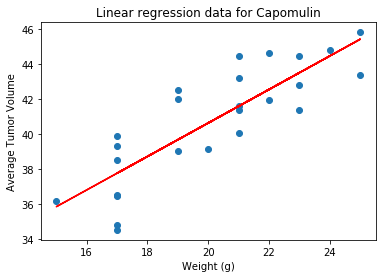

Correlation 0.84


<Figure size 432x288 with 0 Axes>

In [454]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

Capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin", :]
group_drug = Capomulin_df.groupby("Mouse ID").mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(group_drug["Weight (g)"],group_drug['Tumor Volume (mm3)'])
#Capomulin_df.plot.scatter(weight_df,avg_df).invert_xaxis()
regress_values = group_drug["Weight (g)"] * slope + intercept

plt.scatter(group_drug["Weight (g)"],group_drug['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title("Linear regression data for Capomulin")
plt.plot(group_drug["Weight (g)"],regress_values,"r-")
plt.show()
plt.savefig('Scatter2')
print(f"Correlation {round(st.pearsonr(group_drug['Weight (g)'],group_drug['Tumor Volume (mm3)'])[0],2)}")
